In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
le = LabelEncoder()

In [6]:
y = le.fit_transform(y)

In [7]:
print(le.classes_)
print(le.transform(['B','M']))

['B' 'M']
[0 1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [9]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))

In [10]:
pipe.fit(X_train, y_train)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [11]:
y_pred = pipe.predict(X_test)

In [12]:
pipe.score(X_test, y_test)

0.956140350877193

In [13]:
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []

In [14]:
for k, (train, test) in enumerate(kfold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print('fold : %2d | class dist : %s | Acc : %.3f' % (k+1, np.bincount(y_train[train]), score))

fold :  1 | class dist : [256 153] | Acc : 0.935
fold :  2 | class dist : [256 153] | Acc : 0.935
fold :  3 | class dist : [256 153] | Acc : 0.957
fold :  4 | class dist : [256 153] | Acc : 0.957
fold :  5 | class dist : [256 153] | Acc : 0.935
fold :  6 | class dist : [257 153] | Acc : 0.956
fold :  7 | class dist : [257 153] | Acc : 0.978
fold :  8 | class dist : [257 153] | Acc : 0.933
fold :  9 | class dist : [257 153] | Acc : 0.956
fold : 10 | class dist : [257 153] | Acc : 0.956


C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [16]:
scores = cross_val_score(estimator=pipe,X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [21]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))

In [23]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv = 10,
                                                       n_jobs=-1)

In [24]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

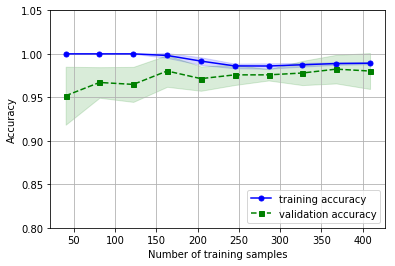

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', linestyle='--', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.show()
plt.tight_layout()

# Addressing over and under fitting with validation curves

In [30]:
from sklearn.model_selection import validation_curve

In [38]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0 ]

train_scores, test_scores = validation_curve(estimator=pipe,
                                          X=X_train,
                                          y=y_train,
                                          param_name='logisticregression__C',
                                          param_range=param_range,
                                          cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

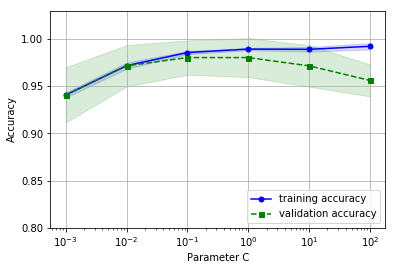

In [39]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', marker='s', linestyle='--', markersize=5, label='validation accuracy')

plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel("Parameter C")
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

# Tuning ML models via GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [45]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C':param_range,
              'svc__kernel' : ['linear']},
             { 'svc__C' : param_range,
              'svc__gamma':param_range,
              'svc__kernel':['rbf']}]

gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)


gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__kernel': ['linear']}, {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
print(gs.best_score_)
print(gs.best_params_)

0.9846153846153847
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [47]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

# Algorithm Selection with nested cross-validation

In [49]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=2)

scores = cross_val_score(gs, X_train, y_train, cv=5)

print(f'score  : {np.mean(scores)} & STD is : {np.std(scores)}')

score  : 0.9736263736263737 & STD is : 0.014906219743132467


In [52]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7,None]}],
                 scoring='accuracy',
                 cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

print(f'score  : {np.mean(scores)} & STD is : {np.std(scores)}')

score  : 0.9340659340659341 & STD is : 0.015540808377726326


#  Looking at the different performance evaluation metrics

In [60]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer

In [55]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


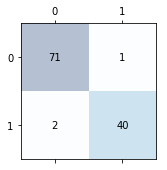

In [57]:
fig, ax =plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
        
plt.show()

In [59]:
print(f' Precision Score : {precision_score(y_test, y_pred)} recall {recall_score(y_test, y_pred)} f1 {f1_score(y_test, y_pred)}')

 Precision Score : 0.975609756097561 recall 0.9523809523809523 f1 0.963855421686747


In [61]:
scorer = make_scorer(f1_score, pos_label=0)

In [62]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring=scorer,
                 cv=10)

In [63]:
gs = gs.fit(X_train, y_train)

In [64]:
print(gs.best_score_)

0.9880219137963148


In [65]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
